 
  <h1><center><font size=10>Google Query</center></font></h1>
  <h1><center>Exploratory Data Analysis - Google Query Case Study</center></h1>

<p>This data analysis delves into Google search data by DMA. By examining this data, we aim to uncover insights into:
</p>
<ol>
    <li>
        <p>Searches for NBA team-related terms.</p>
    </li>
    <li>
        <p>The relationship between NBA teams' records (winning percentage) and searches for the teams.</p>
    </li>
    
</ol>

In [15]:
# Libraries to help with reading and manipulating data
import numpy as np
import geopandas as gpd
import hvplot.pandas
import pandas as pd
import requests
from pathlib import Path

# Libraries to help with data visualization
import matplotlib.pyplot as plt
from scipy.stats import linregress



In [2]:
# Study data files
google_query_top_search_path = "data/Google_BIQuery_Long_Lat.csv"

google_query_top_search_data = pd.read_csv(google_query_top_search_path)

# Read the CSV into a Pandas DataFrame
google_queryDF = pd.DataFrame(google_query_top_search_data)

# Display the data table for preview
google_queryDF.head()

,week,month,score,rank,refresh_date,dma_name,state,region,latitude,longitude,dma_id,term,category
0,1/7/24,January,NaN,1,5/15/24,Portland-Auburn ME,ME,Northeast,45.253783,-69.445469,500,Harrison Butker,Sports
1,1/7/24,January,NaN,1,5/15/24,Charlotte NC,NC,South,35.759573,-79.019300,517,Harrison Butker,Sports
2,1/7/24,January,NaN,1,5/15/24,Wilmington NC,NC,South,35.759573,-79.019300,550,Harrison Butker,Sports
3,1/7/24,January,NaN,1,5/15/24,Dothan AL,AL,South,32.318231,-86.902298,606,Harrison Butker,Sports
4,1/7/24,January,NaN,1,5/15/24,Baltimore MD,MD,Northeast,39.045755,-76.641271,512,Harrison Butker,Sports


In [3]:
# Print the last five rows of data to the screen
google_queryDF.tail()

,week,month,score,rank,refresh_date,dma_name,state,region,latitude,longitude,dma_id,term,category
115479,5/12/24,May,100.0,25,5/13/24,Youngstown OH,OH,Midwest,40.417287,-82.907123,536,Paul Skenes,Sports
115480,5/12/24,May,100.0,25,5/13/24,Monroe LA-El Dorado AR,AR,South,35.201050,-91.831833,628,Paul Skenes,Sports
115481,5/12/24,May,100.0,25,5/13/24,Austin TX,TX,South,31.968599,-99.901813,635,Paul Skenes,Sports
115482,5/12/24,May,100.0,25,5/13/24,Bluefield-Beckley-Oak Hill WV,WV,South,38.597626,-80.454903,559,Paul Skenes,Sports
115483,5/12/24,May,18.0,25,5/13/24,Abilene-Sweetwater TX,TX,South,31.968599,-99.901813,662,Paul Skenes,Sports


Text(0, 0.5, '# of Categories')

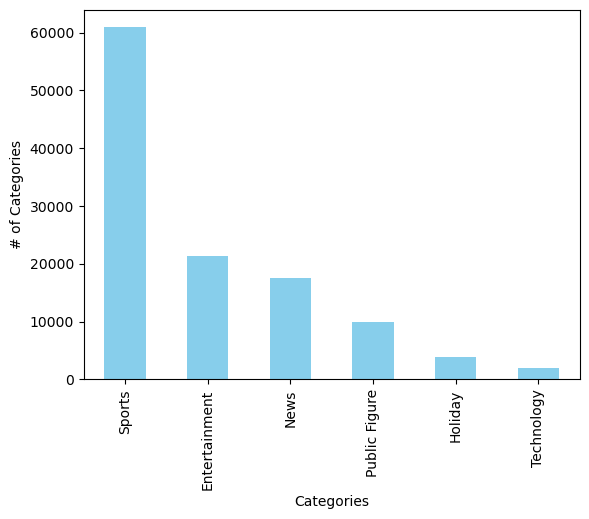

In [4]:
dma_counts_df = google_queryDF.groupby('category')

miceCount = google_queryDF["category"].value_counts()
plotsShow = miceCount.plot.bar(color='skyblue')  
# Set the xlabel, ylabel, and title using class methods
plt.xlabel("Categories")
plt.ylabel("# of Categories")

In [5]:
category_counts = google_queryDF['category'].value_counts()
total_category_entries = len(google_queryDF['category'])
regional_distribution = (category_counts / total_category_entries) * 100
result_df = pd.concat([category_counts, regional_distribution], axis=1)
result_df.columns = ['Counts', 'Percentage']
result_df

,Counts,Percentage
category,,
Sports,60898,52.732846
Entertainment,21292,18.437186
News,17469,15.126771
Public Figure,9905,8.576946
Holiday,3953,3.422985
Technology,1967,1.703266


In [6]:
regional_counts = google_queryDF['region'].value_counts()
total_regional_entries = len(google_queryDF['region'])
regional_distribution = (regional_counts / total_regional_entries) * 100
result_df = pd.concat([regional_counts, regional_distribution], axis=1)
result_df.columns = ['Counts', 'Percentage']
result_df

,Counts,Percentage
region,,
South,45988,39.821967
Midwest,31883,27.608154
West,23111,20.012296
Northeast,14502,12.557584


Text(0.5, 0, 'Regions')

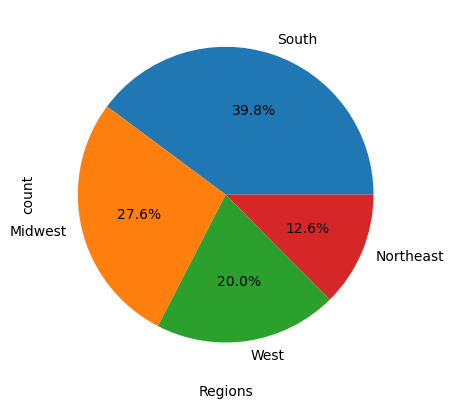

In [7]:
dma_counts_df = google_queryDF.groupby('region')

miceCount = google_queryDF["region"].value_counts()
plotsShow = miceCount.plot.pie(autopct= "%1.1f%%") 
# Set the xlabel, ylabel, and title using class methods
plt.xlabel("Regions")



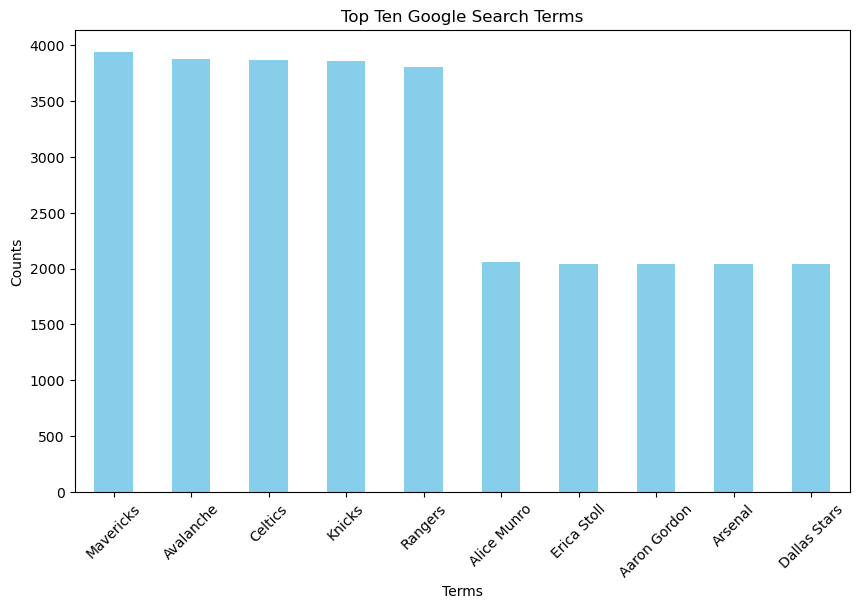

In [8]:
category_counts = google_queryDF['term'].value_counts()
total_entries = len(google_queryDF['term'])

# Calculate percentage for each category
category_percentage = (category_counts / total_entries) * 100

# Concatenate counts and percentages into a DataFrame
result_df = pd.concat([category_counts, category_percentage], axis=1)
result_df.columns = ['Counts', 'Percentage']

# Sort the DataFrame by counts in descending order
result_df = result_df.sort_values(by='Counts', ascending=False)
top_ten = result_df.head(10)

plt.figure(figsize=(10, 6))
top_ten['Counts'].plot(kind='bar', color='skyblue')
plt.title('Top Ten Google Search Terms')
plt.xlabel('Terms')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

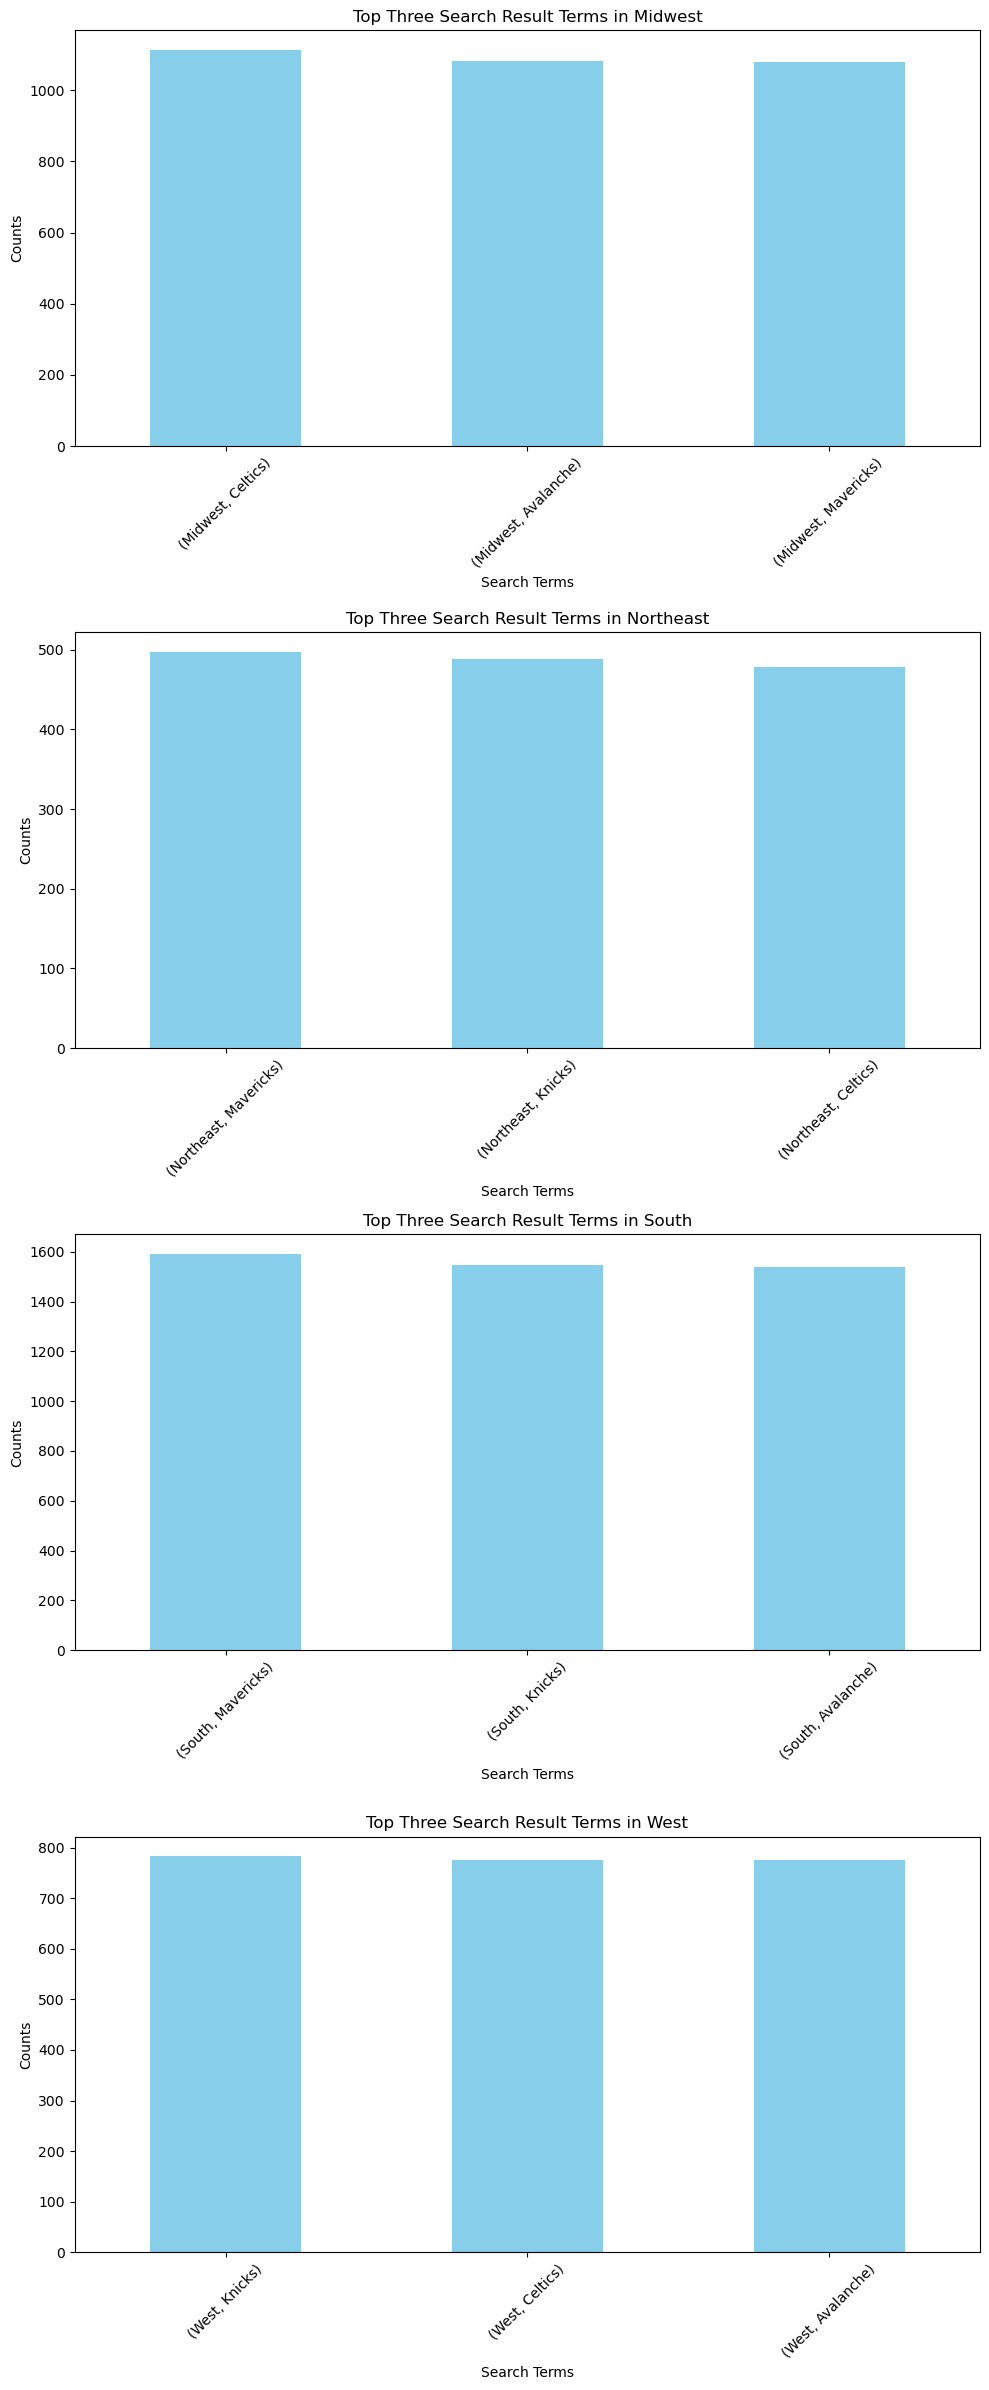

In [9]:
top_terms_by_region = google_queryDF.groupby('region')['term'].value_counts().groupby(level=0).head(3)

# Plotting
fig, axes = plt.subplots(nrows=len(top_terms_by_region.index.levels[0]), ncols=1, figsize=(10, 6 * len(top_terms_by_region.index.levels[0])))

for i, (region, data) in enumerate(top_terms_by_region.groupby(level=0)):
    ax = data.plot(kind='bar', ax=axes[i], color='skyblue')
    ax.set_title(f'Top Three Search Result Terms in {region}')
    ax.set_xlabel('Search Terms')
    ax.set_ylabel('Counts')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


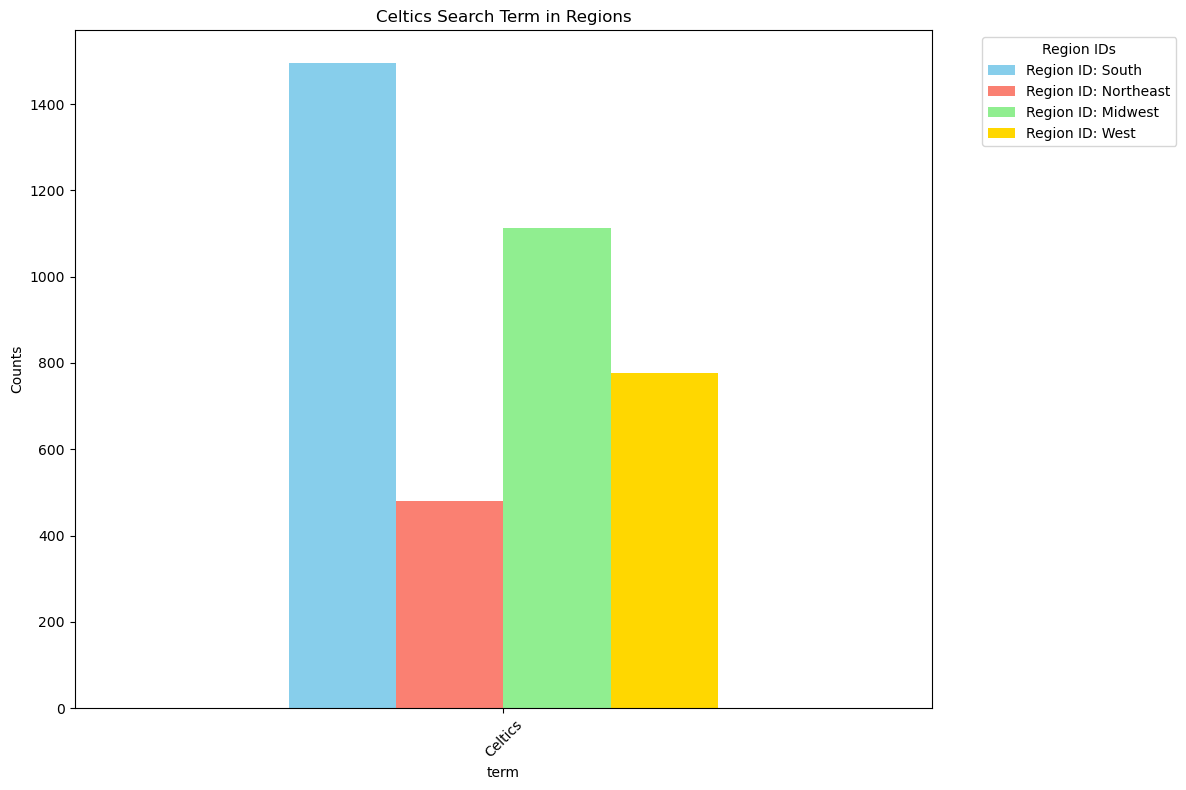

In [10]:
copied_df = google_queryDF.copy()
top_terms_by_region = copied_df.loc[copied_df["term"] == "Celtics", :]
unique_regions = top_terms_by_region['region'].unique()[:10]  # Limiting to top 10 regions

combined_data = pd.DataFrame()

for region_id in unique_regions:
    region_data = top_terms_by_region[top_terms_by_region['region'] == region_id]['term'].value_counts().head(3)
    combined_data[f'Region ID: {region_id}'] = region_data

# Define colors for each region
colors = ['skyblue', 'salmon', 'lightgreen', 'gold', 'lightcoral',
          'lightskyblue', 'palegreen', 'lightpink', 'lightblue', 'lightyellow']

# Plotting combined data
fig, ax = plt.subplots(figsize=(12, 8))
combined_data.plot(kind='bar', ax=ax, color=colors[:len(unique_regions)])  # Using colors for each region
ax.set_title('Celtics Search Term in Regions')
ax.set_ylabel('Counts')
ax.tick_params(axis='x', rotation=45)
plt.legend(title='Region IDs', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

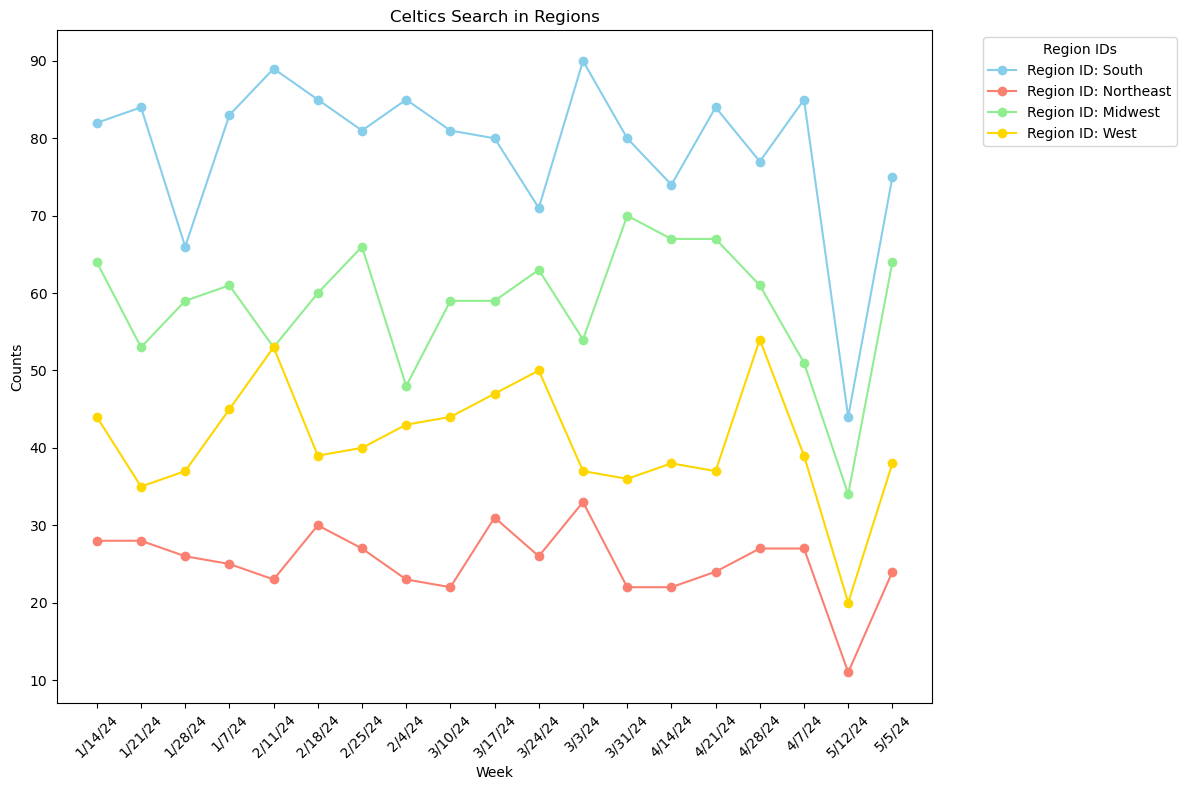

In [11]:
copied_df_2 = google_queryDF.copy()
top_terms_by_region = copied_df_2.loc[copied_df_2["term"] == "Celtics",:]
top_terms_by_region
unique_regions = top_terms_by_region['region'].unique()[:10]  # Limiting to top 10 regions
unique_regions


# Create an empty DataFrame to store combined data
combined_data = pd.DataFrame()

for region_id in unique_regions:
    # Group by both 'region' and 'week' and count occurrences of 'term'
    region_data = top_terms_by_region[top_terms_by_region['region'] == region_id].groupby(['week', 'term']).size().unstack().fillna(0)
    # Take the top three search result terms for each week
    region_data = region_data.apply(lambda x: x.nlargest(3).sum(), axis=1)
    combined_data[f'Region ID: {region_id}'] = region_data

# Plotting combined data
fig, ax = plt.subplots(figsize=(12, 8))
for i, col in enumerate(combined_data.columns):
    ax.plot(combined_data.index, combined_data[col], marker='o', color=colors[i], label=col)

ax.set_title('Celtics Search in Regions')
ax.set_xlabel('Week')
ax.set_ylabel('Counts')
ax.tick_params(axis='x', rotation=45)
plt.legend(title='Region IDs', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


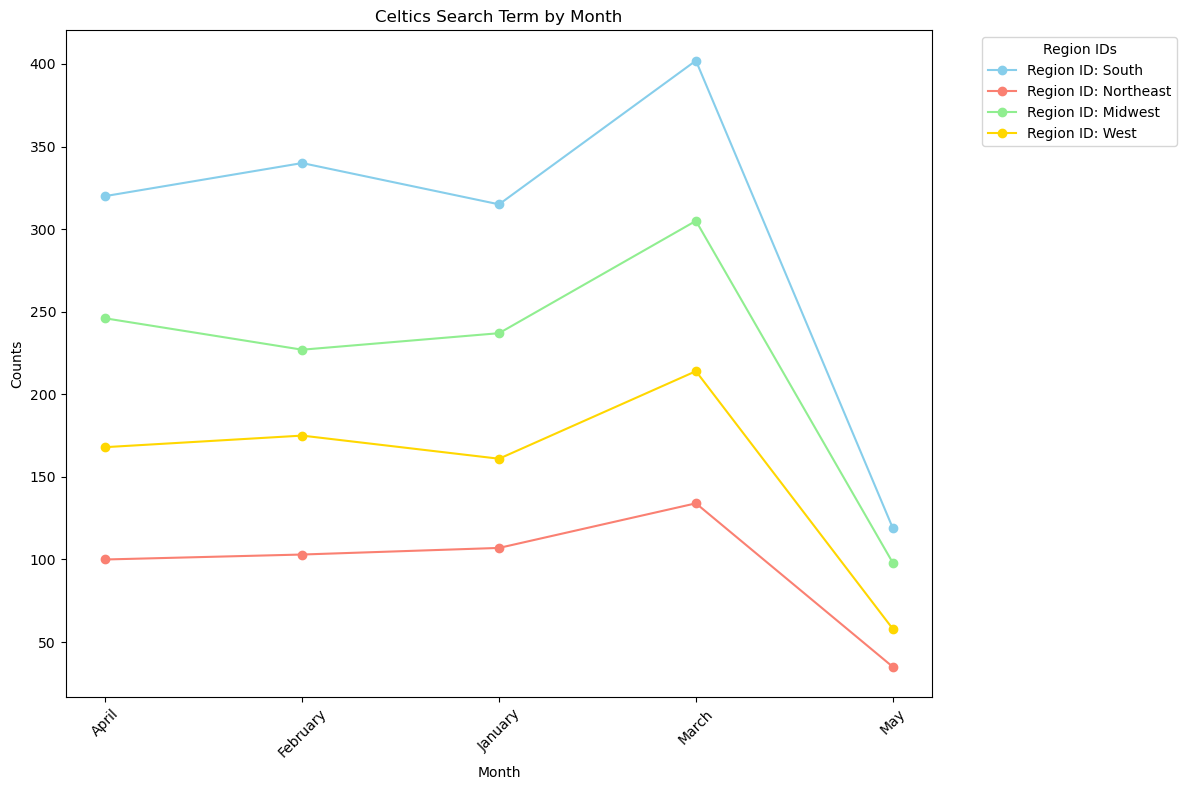

In [12]:
top_terms_by_region = google_queryDF[google_queryDF["term"].isin(["Celtics" ])]
unique_regions = top_terms_by_region['region'].unique()[:10]  # Limiting to top 10 regions

# Create an empty DataFrame to store combined data
combined_data = pd.DataFrame()



for region_id in unique_regions:
    # Group by both 'region' and 'week' and count occurrences of 'term'
    region_data = top_terms_by_region[top_terms_by_region['region'] == region_id].groupby(['month', 'term']).size().unstack().fillna(0)
    # Take the top three search result terms for each week
    region_data = region_data.apply(lambda x: x.nlargest(3).sum(), axis=1)
    combined_data[f'Region ID: {region_id}'] = region_data

# Plotting combined data
fig, ax = plt.subplots(figsize=(12, 8))
for i, col in enumerate(combined_data.columns):
    ax.plot(combined_data.index, combined_data[col], marker='o', color=colors[i], label=col)

ax.set_title('Celtics Search Term by Month')
ax.set_xlabel('Month')
ax.set_ylabel('Counts')
ax.tick_params(axis='x', rotation=45)
plt.legend(title='Region IDs', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [34]:
top_terms_by_region = google_queryDF[google_queryDF["term"].isin(["Harrison Butker"])]
unique_regions = top_terms_by_region['region'].unique()[:10]  # Limiting to top 10 regions

combined_data = pd.DataFrame()

for region_id in unique_regions:
    # Group by both 'region' and 'week' and count occurrences of 'term'
    region_data = top_terms_by_region[top_terms_by_region['region'] == region_id].groupby(['state', 'term']).size().unstack().fillna(0)
    # Take the top three search result terms for each week
    region_data = region_data.apply(lambda x: x.nlargest(3).sum(), axis=1)
    combined_data[f'Region ID: {region_id}'] = region_data

plot = combined_data.hvplot.line(x='state', y=list(combined_data.columns), 
                                 xlabel='State', ylabel='Counts',
                                 title='Harrison Butker Search Term by State',
                                 width=800, height=500, 
                                 legend='top_left', 
                                 grid=True, shared_axes=True)

# Display the plot using Bokeh for interactivity
plot.opts(show_grid=True, tools=['hover'], toolbar='above')

:NdOverlay   [Variable]
   :Curve   [state]   (value)

In [35]:

top_terms_by_region = google_queryDF[google_queryDF["term"].isin(["Celtics"])]
unique_regions = top_terms_by_region['region'].unique()[:10]  # Limiting to top 10 regions

combined_data = pd.DataFrame()

for region_id in unique_regions:
    # Group by both 'region' and 'week' and count occurrences of 'term'
    region_data = top_terms_by_region[top_terms_by_region['region'] == region_id].groupby(['state', 'term']).size().unstack().fillna(0)
    # Take the top three search result terms for each week
    region_data = region_data.apply(lambda x: x.nlargest(3).sum(), axis=1)
    combined_data[f'Region ID: {region_id}'] = region_data

usa_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the map data with combined_data DataFrame
merged_data = usa_map.merge(combined_data, how='left', left_on='name', right_index=True).fillna(0)
print(top_terms_by_region.shape)  # Check dimensions of top_terms_by_region
print(combined_data.shape)  
# List of southern states
southern_states = ['Alabama', 'Arkansas', 'Florida', 'Georgia', 'Louisiana',
                   'Mississippi', 'North Carolina', 'South Carolina', 'Tennessee',
                   'Texas', 'Virginia', 'West Virginia']

# Filter merged_data for southern states
southern_data = merged_data[merged_data['name'].isin(southern_states)]
southern_data
plot = combined_data.hvplot.line(x='state', y=list(combined_data.columns), 
                                 xlabel='State', ylabel='Counts',
                                 title='Celtics Search Term by State',
                                 width=800, height=500, 
                                 legend='top_left', 
                                 grid=True, shared_axes=True)
plot.opts(show_grid=True, tools=['hover'], toolbar='above')

(3864, 13)
(15, 4)


/var/folders/kb/hzdl45tn52d2sj_2dt8x7_rm0000gn/T/ipykernel_89145/2840986556.py:13: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  usa_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


:NdOverlay   [Variable]
   :Curve   [state]   (value)

In [36]:
top_terms_by_region = google_queryDF[google_queryDF["term"].isin(["Sean Burroughs"])]
unique_regions = top_terms_by_region['region'].unique()[:10]  # Limiting to top 10 regions

combined_data = pd.DataFrame()

for region_id in unique_regions:
    # Group by both 'region' and 'week' and count occurrences of 'term'
    region_data = top_terms_by_region[top_terms_by_region['region'] == region_id].groupby(['state', 'term']).size().unstack().fillna(0)
    # Take the top three search result terms for each week
    region_data = region_data.apply(lambda x: x.nlargest(3).sum(), axis=1)
    combined_data[f'Region ID: {region_id}'] = region_data

plot = combined_data.hvplot.line(x='state', y=list(combined_data.columns), 
                                 xlabel='State', ylabel='Counts',
                                 title='Knicks Search Term by State',
                                 width=800, height=500, 
                                 legend='top_left', 
                                 grid=True, shared_axes=True)

# Display the plot using Bokeh for interactivity
plot.opts(show_grid=True, tools=['hover'], toolbar='above')

:NdOverlay   [Variable]
   :Curve   [state]   (value)